<a href="https://colab.research.google.com/github/PRAN20/Spatial-Filtering-CV/blob/main/Spatial_Filtering_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Images**

In [24]:
!wget https://i.pinimg.com/564x/90/96/76/909676f235ab83668c709e58539763cf.jpg -O image1.png
!wget https://i.pinimg.com/564x/c7/e7/9e/c7e79ee3b52f388db2d0c826340112b8.jpg -O image2.png
!wget https://i.pinimg.com/564x/b1/7d/5b/b17d5bdecdbb4ed0f167922f5b545f8e.jpg -O image3.png

--2022-01-21 14:07:17--  https://i.pinimg.com/564x/90/96/76/909676f235ab83668c709e58539763cf.jpg
Resolving i.pinimg.com (i.pinimg.com)... 23.35.185.56, 2600:1406:c800:48c::1931, 2600:1406:c800:497::1931, ...
Connecting to i.pinimg.com (i.pinimg.com)|23.35.185.56|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58749 (57K) [image/jpeg]
Saving to: ‘image1.png’

image1.png          100%[===================>]  57.37K  --.-KB/s    in 0.01s   

2022-01-21 14:07:18 (5.88 MB/s) - ‘image1.png’ saved [58749/58749]

--2022-01-21 14:07:18--  https://i.pinimg.com/564x/c7/e7/9e/c7e79ee3b52f388db2d0c826340112b8.jpg
Resolving i.pinimg.com (i.pinimg.com)... 23.35.185.56, 2600:1406:c800:48c::1931, 2600:1406:c800:497::1931, ...
Connecting to i.pinimg.com (i.pinimg.com)|23.35.185.56|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76280 (74K) [image/jpeg]
Saving to: ‘image2.png’

image2.png          100%[===================>]  74.49K  --.-KB/s    in 0.01s 

We will import the following libraries


In [25]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

This function will plot two images side by side


In [26]:
def plot_image(image_1, image_2,title_1="Orignal",title_2="New Image"):
    plt.figure(figsize=(10,10))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB))
    plt.title(title_1)
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB))
    plt.title(title_2)
    plt.show()

## Linear  Filtering


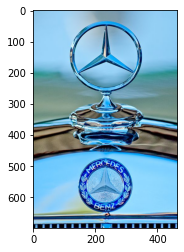

In [29]:
image = cv2.imread("image1.png")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

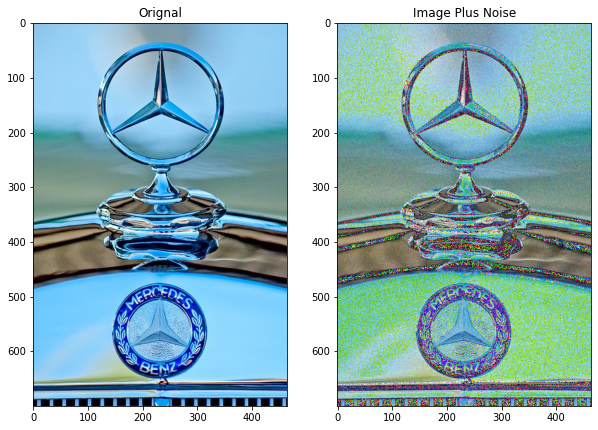

In [30]:
rows, cols,_= image.shape
noise = np.random.normal(0,15,(rows,cols,3)).astype(np.uint8)
noisy_image = image + noise
plot_image(image, noisy_image, title_1="Orignal",title_2="Image Plus Noise")

### Filtering Noise


In [31]:
kernel = np.ones((6,6))/36

In [32]:
image_filtered = cv2.filter2D(src=noisy_image, ddepth=-1, kernel=kernel)

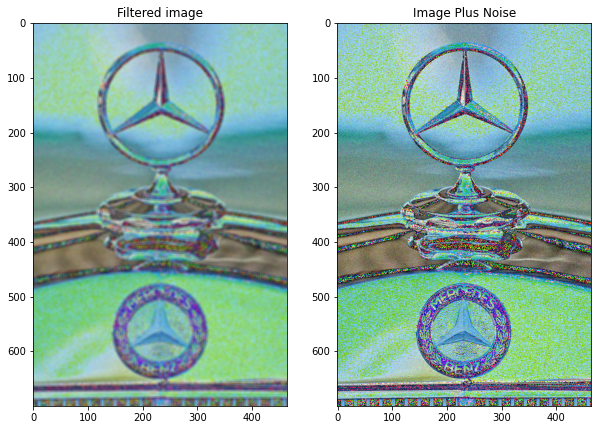

In [33]:
plot_image(image_filtered, noisy_image,title_1="Filtered image",title_2="Image Plus Noise")

A smaller kernel keeps the image sharp, but filters less noise, here we try a 4x4 kernel


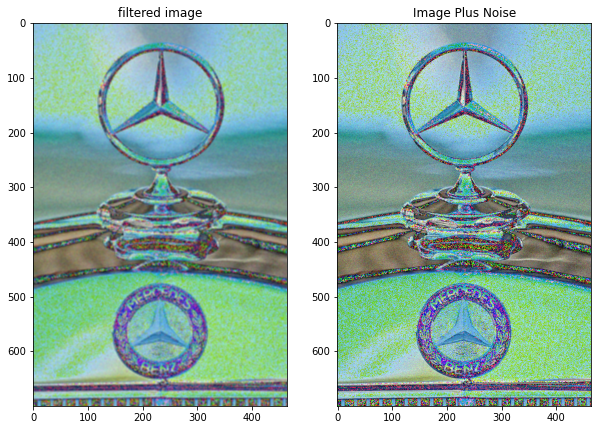

In [34]:
kernel = np.ones((4,4))/16
image_filtered=cv2.filter2D(src=noisy_image,ddepth=-1,kernel=kernel)
plot_image(image_filtered , noisy_image,title_1="filtered image",title_2="Image Plus Noise")

### Gaussian Blur


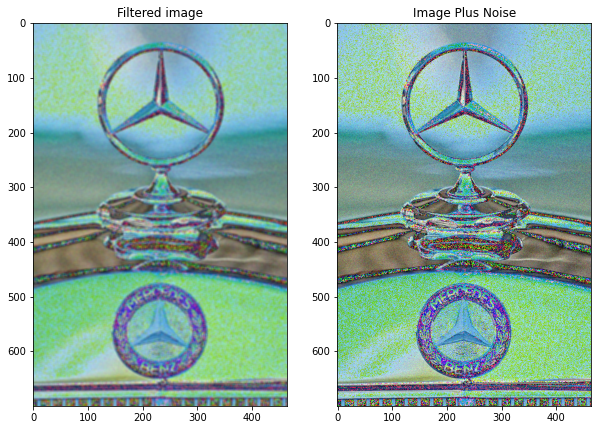

In [35]:
image_filtered = cv2.GaussianBlur(noisy_image,(5,5),sigmaX=4,sigmaY=4)
plot_image(image_filtered , noisy_image,title_1="Filtered image",title_2="Image Plus Noise")

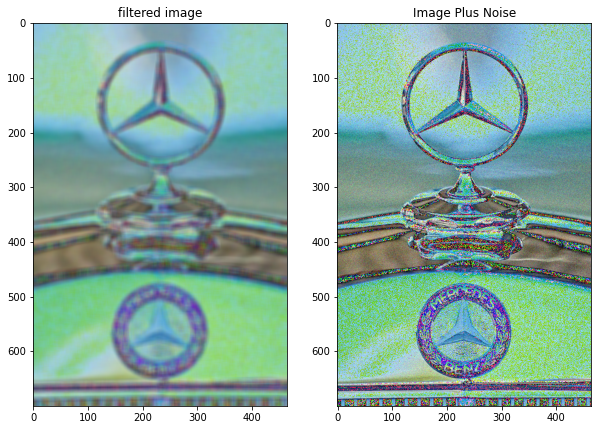

In [36]:
image_filtered = cv2.GaussianBlur(noisy_image,(11,11),sigmaX=10,sigmaY=10)
plot_image(image_filtered , noisy_image,title_1="filtered image",title_2="Image Plus Noise")

### Image Sharpening


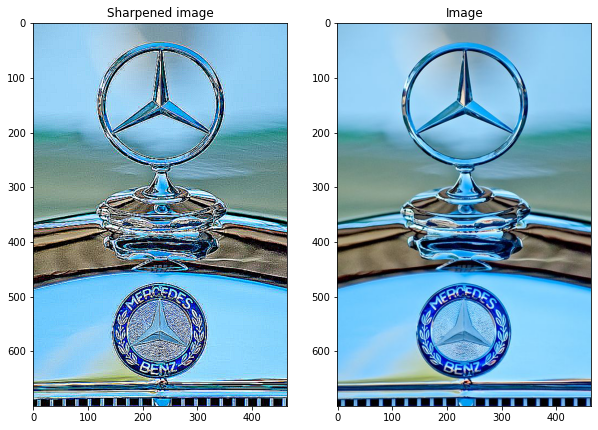

In [37]:
kernel = np.array([[-1,-1,-1], 
                   [-1, 9,-1],
                   [-1,-1,-1]])
sharpened = cv2.filter2D(image, -1, kernel)
plot_image(sharpened , image, title_1="Sharpened image",title_2="Image")

## Edges


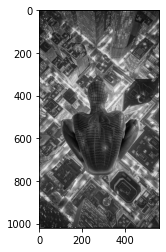

In [40]:
img_gray = cv2.imread('image3.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(img_gray ,cmap='gray')

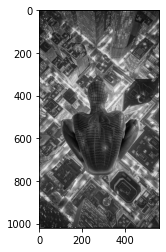

In [41]:
img_gray = cv2.GaussianBlur(img_gray,(3,3),sigmaX=0.1,sigmaY=0.1)
plt.imshow(img_gray ,cmap='gray')

In [43]:
ddepth = cv2.CV_16S
grad_x = cv2.Sobel(src=img_gray, ddepth=ddepth, dx=1, dy=0, ksize=3)

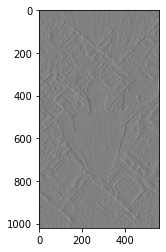

In [44]:
plt.imshow(grad_x,cmap='gray')

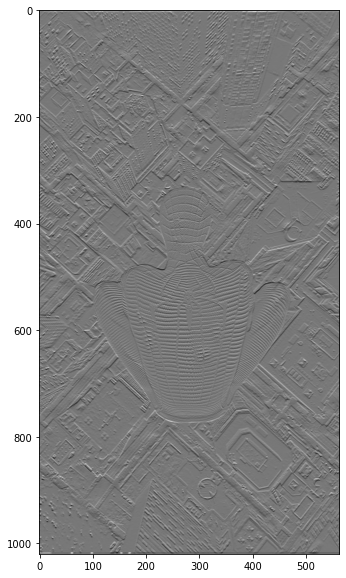

In [46]:
grad_y = cv2.Sobel(src=img_gray, ddepth=ddepth, dx=0, dy=1, ksize=3)
plt.figure(figsize = (10,10))
plt.imshow(grad_y,cmap='gray')

In [47]:
abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)

In [49]:
grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

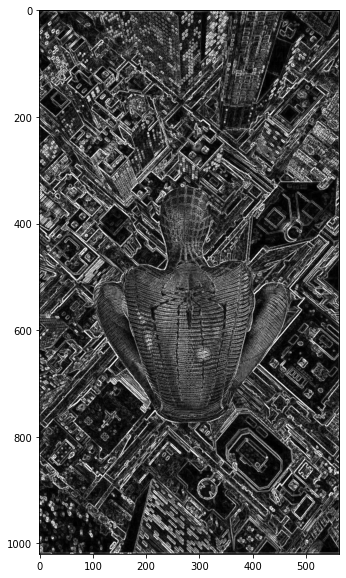

In [50]:
plt.figure(figsize=(10,10))
plt.imshow(grad,cmap='gray')

## Median



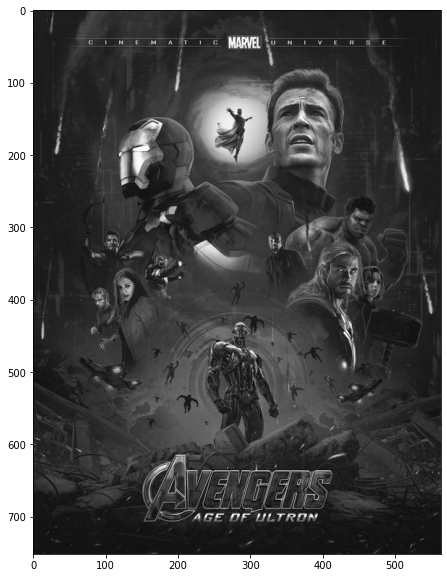

In [51]:
image = cv2.imread("image2.png",cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(10,10))
plt.imshow(image,cmap="gray")

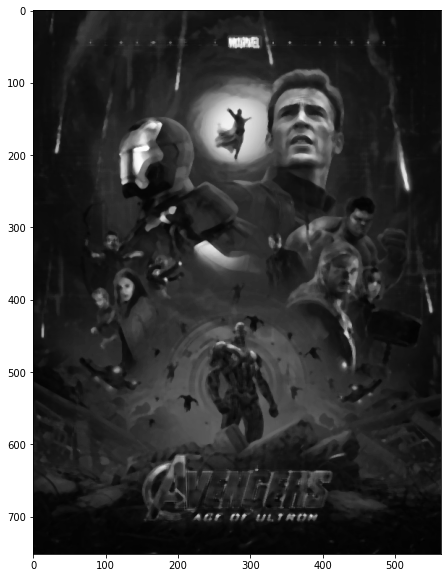

In [52]:
filtered_image = cv2.medianBlur(image, 5)
plt.figure(figsize=(10,10))
plt.imshow(filtered_image,cmap="gray")

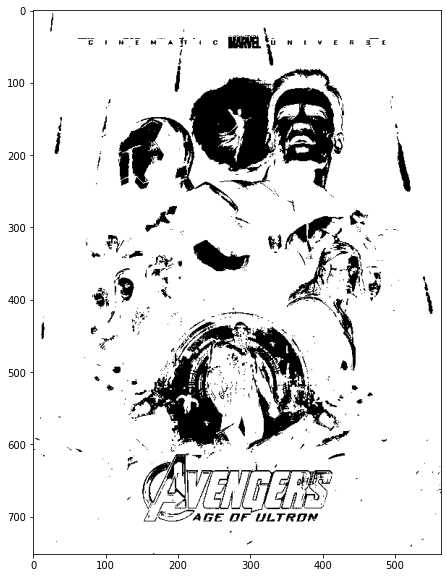

In [53]:
ret, outs = cv2.threshold(src = image, thresh = 0, maxval = 255, type = cv2.THRESH_OTSU+cv2.THRESH_BINARY_INV)
plt.figure(figsize=(10,10))
plt.imshow(outs, cmap='gray')